---
title: 텍스트 데이터 다루기
jupyter: python3
---

In [4]:
from preamble import *
%config InlineBackend.figure_format='retina'

## 예제 어플리케이션: 영화 리뷰 감성 분석

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 75000
text_train[6]:
 b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The titular s

In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500 50000]


In [8]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


## 텍스트 데이터를 BOW로 표현하기

### 샘플 데이터에 BOW 적용하기

In [10]:
bards_words = [
    "The fool doth think he is wise,",
    "but the wise man knows himself to be a fool",
]

##### BOW => 단어 빈도
###### 1. 단어 구분 : 구획점을 잡아서 하나하나를 개별적으로 만듦
###### 2. 정렬 : 구분 후 중복을 포함한 소팅. 이 때 정렬과 카운팅 동시에 가능 (A to Z)
###### 3. 카운팅

##### 컴퓨터에 이걸 시킨다면
###### 1. 단어 구분 : 컴퓨터는 단어를 모름. 토큰이라는 단어로 다 치환시킴. 
###### 토큰(가장 작은 데이터를 가지고 있는 정보 뭉치) 토큰 분리(와 동시에) 
###### + 불용어 처리(ex. 구둣점, NC=>욕 -> 분석하지 않을 말)
###### 2. 정렬 : 대소비교 선행되어야 -> 토큰을 숫자로 바꿈
###### 3. 카운팅 : 누계합산

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [12]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [13]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


sparse matrix : 희소 행렬 : 안의 행렬이 다 차있지 않은 행렬

In [14]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 영화 리뷰에 대한 BOW

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


In [16]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 124255
처음 20개 특성:
 ['00' '000' '0000' '0000000000000000000000000000000001' '0000000000001'
 '000000001' '000000003' '00000001' '000001745' '00001' '0001' '00015'
 '0002' '0007' '00083' '000ft' '000s' '000th' '001' '002']
20010에서 20030까지 특성:
 ['cheapen' 'cheapened' 'cheapening' 'cheapens' 'cheaper' 'cheapest'
 'cheapie' 'cheapies' 'cheapjack' 'cheaply' 'cheapness' 'cheapo'
 'cheapozoid' 'cheapquels' 'cheapskate' 'cheapskates' 'cheapy' 'chearator'
 'cheat' 'cheata']
매 2000번째 특성:
 ['00' '_require_' 'aideed' 'announcement' 'asteroid' 'banquière'
 'besieged' 'bollwood' 'btvs' 'carboni' 'chcialbym' 'clotheth'
 'consecration' 'cringeful' 'deadness' 'devagan' 'doberman' 'duvall'
 'endocrine' 'existent' 'fetiches' 'formatted' 'garard' 'godlie' 'gumshoe'
 'heathen' 'honoré' 'immatured' 'interested' 'jewelry' 'kerchner' 'köln'
 'leydon' 'lulu' 'mardjono' 'meistersinger' 'misspells' 'mumblecore'
 'ngah' 'oedpius' 'overwhelmingly' 'penned' 'pleading' 'previlage'
 'quashed' 'recreating' 'reve

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, n_jobs=-1)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수: 0.69


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 점수: 0.71
최적의 매개변수:  {'C': 0.1}


In [19]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.18


In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <75000x44532 sparse matrix of type '<class 'numpy.int64'>'
	with 10191240 stored elements in Compressed Sparse Row format>


In [22]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00' '000' '001' '007' '00am' '00pm' '00s' '01' '02' '03' '04' '05' '06'
 '07' '08' '09' '10' '100' '1000' '1001' '100k' '100th' '100x' '101'
 '101st' '102' '103' '104' '105' '106' '107' '108' '109' '10am' '10pm'
 '10s' '10th' '10x' '11' '110' '1100' '110th' '111' '112' '1138' '115'
 '116' '117' '11pm' '11th']
20,010부터 20,030까지 특성:
 ['inert' 'inertia' 'inescapable' 'inescapably' 'inevitability'
 'inevitable' 'inevitably' 'inexcusable' 'inexcusably' 'inexhaustible'
 'inexistent' 'inexorable' 'inexorably' 'inexpensive' 'inexperience'
 'inexperienced' 'inexplicable' 'inexplicably' 'inexpressive'
 'inextricably']
매 700번째 특성:
 ['00' 'accountability' 'alienate' 'appetite' 'austen' 'battleground'
 'bitten' 'bowel' 'burton' 'cat' 'choreographing' 'collide' 'constipation'
 'creatively' 'dashes' 'descended' 'dishing' 'dramatist' 'ejaculation'
 'epitomize' 'extinguished' 'figment' 'forgot' 'garnished' 'goofy' 'gw'
 'hedy' 'hormones' 'imperfect' 'insomniac' 'janitorial' 'keira' 'lansi

In [23]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.71


## 불용어

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['around', 'beyond', 'whoever', 'three', 'is', 'until', 'sincere', 'whole', 'enough', 'almost', 'and', 'seemed', 'myself', 'which', 'whither', 'whereby', 'well', 'other', 'hasnt', 'any', 'everyone', 'be', 'or', 'more', 'about', 'this', 'our', 'even', 'rather', 'their', 'why', 'before']


In [25]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [26]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.71


In [27]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=5000))
param_grid = {
    "countvectorizer__max_df": [100, 1000, 10000, 20000],
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10],
}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

최상의 교차 검증 점수: 0.72
{'countvectorizer__max_df': 100, 'logisticregression__C': 0.1}


In [28]:
len(grid.best_estimator_.named_steps["countvectorizer"].vocabulary_)

115854

TypeError: Only length-1 arrays can be converted to Python scalars

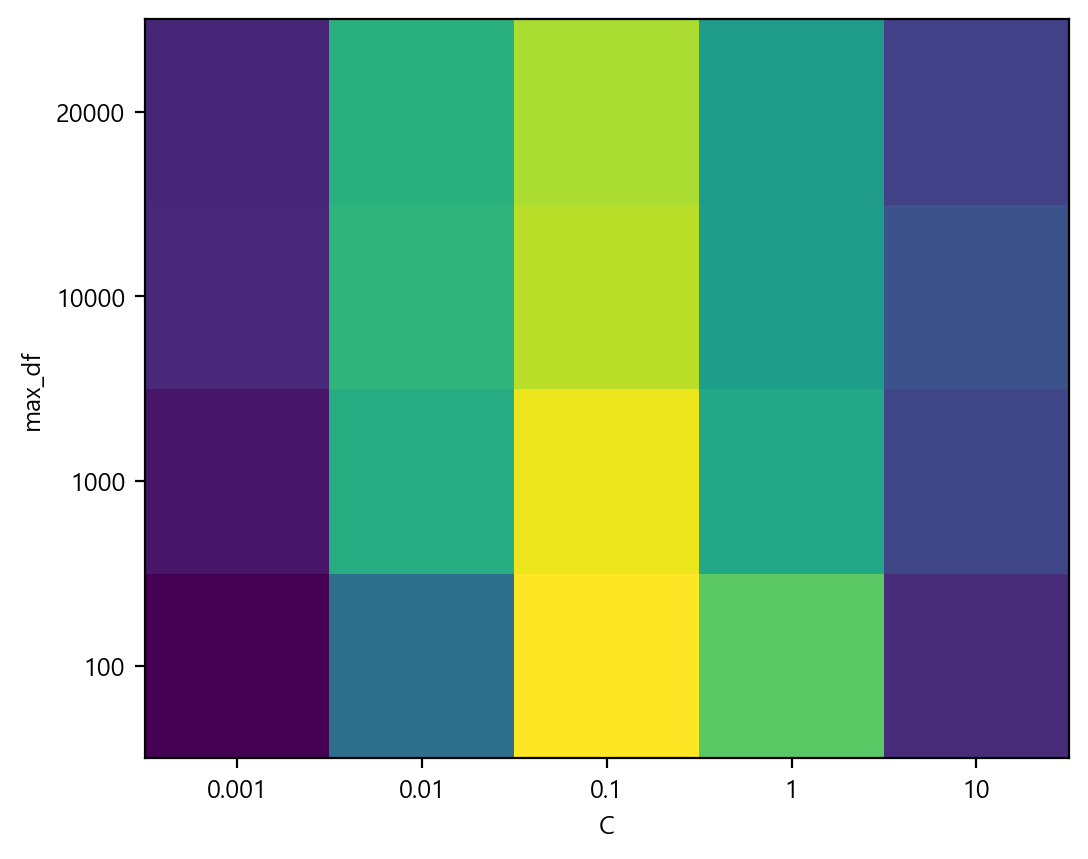

In [30]:
scores = grid.cv_results_["mean_test_score"].reshape(-1, 5)
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores,
    xlabel="C",
    ylabel="max_df",
    cmap="viridis",
    fmt="%.3f",
    xticklabels=param_grid["logisticregression__C"],
    yticklabels=param_grid["countvectorizer__max_df"],
)
plt.colorbar(heatmap)
plt.show()  # 책에는 없음

## tf–idf로 데이터 스케일 변경
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names_out())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])

print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

## 모델 계수 조사

In [ ]:
grid.best_estimator_.named_steps["logisticregression"].coef_

In [ ]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names,
    n_top_features=40,
)

## 여러 단어로 만든 BOW (n-그램)

In [ ]:
print("bards_words:\n", bards_words)

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

In [ ]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

In [ ]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

In [ ]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_["mean_test_score"].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores,
    xlabel="C",
    ylabel="ngram_range",
    cmap="viridis",
    fmt="%.3f",
    xticklabels=param_grid["logisticregression__C"],
    yticklabels=param_grid["tfidfvectorizer__ngram_range"],
)
plt.colorbar(heatmap)
plt.show()  # 책에는 없음

In [ ]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps["tfidfvectorizer"]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps["logisticregression"].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)
plt.show()  # 책에는 없음

In [ ]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다
mglearn.tools.visualize_coefficients(
    coef.ravel()[mask], feature_names[mask], n_top_features=40
)
plt.ylim(-22, 22)
plt.show()  # 책에는 없음

## 고급 토큰화, 어간 추출, 표제어 추출

nltk와 spacy를 설치합니다.

In [ ]:
!pip install -q nltk spacy

import spacy

try:
    en_nlp = spacy.load('en_core_web_sm')
except:
    !pip install spacy
    !python -m spacy download en

In [ ]:
import spacy
import nltk

# spacy의 영어 모델을 로드합니다
en_nlp = spacy.load("en_core_web_sm")
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()


# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [ ]:
compare_normalization(
    "Our meeting today was worse than yesterday, "
    "I'm scared of meeting the clients tomorrow."
)

In [ ]:
# 요구사항: spacy에서 표제어 추출 기능과 CountVectorizer의 토큰 분할기를 사용합니다.

# spacy의 언어 모델을 로드합니다
en_nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]


# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

# 비교를 위해 표준 CountVectorizer를 사용합니다
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape:", X_train.shape)

In [ ]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 만듭니다
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv, n_jobs=-1)
# 기본 CountVectorizer로 그리드 서치를 수행합니다
grid.fit(X_train, y_train)
print(
    "최상의 교차 검증 점수 " "(기본 CountVectorizer): {:.3f}".format(grid.best_score_)
)
# 표제어를 사용해서 그리드 서치를 수행합니다
grid.fit(X_train_lemma, y_train)
print("최상의 교차 검증 점수 " "(표제어): {:.3f}".format(grid.best_score_))

## 토픽 모델링과 문서 군집화
### LDA

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(text_train)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=10, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1
)
# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

In [ ]:
print("lda.components_.shape:", lda.components_.shape)

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names_out())

In [ ]:
# 10개의 토픽을 출력합니다
mglearn.tools.print_topics(
    topics=range(10),
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=5,
    n_words=10,
)

In [ ]:
lda100 = LatentDirichletAllocation(
    n_components=100, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1
)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(
    topics=topics,
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=5,
    n_words=20,
)

In [ ]:
# 음악적인 토픽 45를 가중치로 정렬합니다
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in music[:10]:
    # 첫 두 문장을 출력합니다
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = [
    "{:>2} ".format(i) + " ".join(words)
    for i, words in enumerate(feature_names[sorting[:, :2]])
]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()